In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

Keras: https://keras.io/

### Define the neural network model


Using the Keras Sequential API we define a model with three fully connected layers. 
- The first layer has an input with size of $[\texttt{batch_size}, \texttt{d0}, \texttt{d1}]$. However, in the input shape argument we only need to specify $[\texttt{d0}, \texttt{d1}]$, if the input does not have a second dimension $\texttt{d1}$ then in the input shape argument we can write $(\texttt{d0}, )$.
- The first layer also has an activation function, which we can specify using the activation argument, common choices are ReLU, sigmoid, tanh and linear. 
- By simply adding another Dense object layer to the Sequential model we can build the second layer.

<img src="https://miro.medium.com/max/1400/1*ZB6H4HuF58VcMOWbdpcRxQ.png" alt="NN_Image" width="400">

$$h_1 = g(a_1) = g(W_1^Tx + b_1)$$

$$h_2 = g(a_2) = g(W_2^Th_1 + b_2)$$

$$y = g(a_3) = g(W_3^Th_2 + b_3)$$

In [15]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(1,)),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(
    optimizer='adam', # 'rmsprop', 'sgd'
    loss='mean_squared_error', # 'mae'
    metrics='mse'
)

##ReLU
<img src="https://miro.medium.com/max/1400/1*XxxiA0jJvPrHEJHD4z893g.png" alt="NN_Image" width="800">

### Generate random data

In this example we will try to fit the curve
$$f(x) = x\cos(x) + \sin^2(x)$$

In [18]:
X_train = tf.random.uniform(shape=[1000, ], minval=0, maxval=12)
Y_train = X_train * tf.cos(X_train) + tf.sin(X_train) ** 2 + 0.5*tf.random.normal(shape=[1000, ])

X_test = tf.random.uniform(shape=[500, ], minval=0, maxval=12)
Y_test = X_test * tf.cos(X_test) + tf.sin(X_test) ** 2 + 0.5*tf.random.normal(shape=[500, ])

In [19]:
X_train = tf.reshape(X_train, (-1, 1))
Y_train = tf.reshape(Y_train, (-1, 1))
X_train.shape, Y_train.shape

(TensorShape([1000, 1]), TensorShape([1000, 1]))

Now we can visualize the data, note that since the data is not sorted we should use a scatter plot.

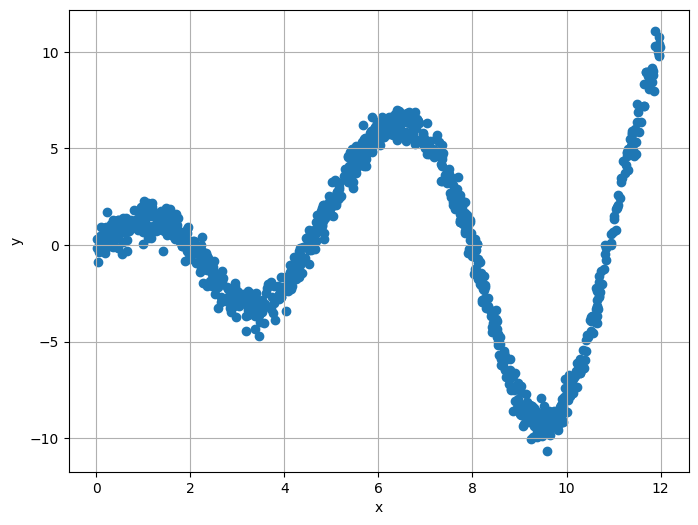

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(X_train.numpy(), Y_train.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

### Training

Using the generated data we can train the neural network model, we train it for 500 epochs (one epoch is one pass over the entire dataset) with a batch size of 64.

In [21]:
# training_history = model.fit(features, labels, epochs=epochs, batch_size=batch_size)
history = model.fit(X_train, Y_train, epochs=1000, validation_split=0.1, batch_size=32)

Epoch 1/1000
29/29 [==============================] - 0s 3ms/step - loss: 22.3166 - mse: 22.3166 - val_loss: 20.9466 - val_mse: 20.9466
Epoch 2/1000
29/29 [==============================] - 0s 791us/step - loss: 21.3563 - mse: 21.3563 - val_loss: 20.4570 - val_mse: 20.4570
Epoch 3/1000
29/29 [==============================] - 0s 785us/step - loss: 21.2826 - mse: 21.2826 - val_loss: 20.3471 - val_mse: 20.3471
Epoch 4/1000
29/29 [==============================] - 0s 803us/step - loss: 21.2588 - mse: 21.2588 - val_loss: 20.4271 - val_mse: 20.4271
Epoch 5/1000
29/29 [==============================] - 0s 769us/step - loss: 21.2476 - mse: 21.2476 - val_loss: 20.3415 - val_mse: 20.3415
Epoch 6/1000
29/29 [==============================] - 0s 802us/step - loss: 21.2478 - mse: 21.2478 - val_loss: 20.2889 - val_mse: 20.2889
Epoch 7/1000
29/29 [==============================] - 0s 741us/step - loss: 21.2595 - mse: 21.2595 - val_loss: 20.1696 - val_mse: 20.1696
Epoch 8/1000
29/29 [================

KeyboardInterrupt: 

In [ ]:
print(len(history.history['loss']))

### Evaluate the performance of the model

Using the `model.predict()` method we can evaluate the performance of our model on the testing dataset and compare it with the corresponding ground truth data.

In [ ]:
# prediction = model.predict(features)
y_hat = model.predict(X_test)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_test.numpy(), Y_test.numpy(), label='Ground Truth')
plt.scatter(X_test.numpy(), y_hat, marker='x', label='Prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [ ]:
loss_history = history.history['loss']

In [ ]:
plt.figure(figsize=(8,6))
plt.semilogy(loss_history)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

### Summary

We can see that using Keras' Sequential API we can build a functional neural network using very few lines of code.
```
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics='mse'
)

history = model.fit(X_train, Y_train, epochs=500, batch_size=32)
```